<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [0]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


## Step 1: Data Loading

In [0]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\DL_Notebk\\train'

In [0]:
#run if folders already created
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [1]:
#run for GitHub Colab
!git clone "https://github.com/BenjLiew/DL_Assg1.git"


Cloning into 'DL_Assg1'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 10108 (delta 41), reused 20 (delta 8), pack-reused 10039
Receiving objects: 100% (10108/10108), 476.75 MiB | 35.38 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Checking out files: 100% (10017/10017), done.


In [0]:
#GitHub Colab directory
# Directories for your training, validation and test splits
train_dir = '/content/DL_Assg1/train'
validation_dir = '/content/DL_Assg1/validation'
test_dir = '/content/DL_Assg1/test'

In [3]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 2:  Develop the Image Classification Models

### VGG19 frozen

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base3 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


#freezeing (without fine tuning of layer freezing)
conv_base3.trainable = False

model3 = models.Sequential()
model3.add(conv_base3) #CGG19 pre-train
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))


conv_base3.summary()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 1443s 2s/step - loss: 1.7820 - acc: 0.3855 - val_loss: 1.4342 - val_acc: 0.5180
Epoch 2/30
750/750 [==============================] - 1433s 2s/step - loss: 1.4362 - acc: 0.5120 - val_loss: 1.2719 - val_acc: 0.5750
Epoch 3/30
750/750 [==============================] - 1418s 2s/step - loss: 1.3220 - acc: 0.5397 - val_loss: 1.1871 - val_acc: 0.5995
Epoch 4/30
750/750 [==============================] - 1417s 2s/step - loss: 1.2758 - acc: 0.5569 - val_loss: 1.1413 - val_acc: 0.6070
Epoch 5/30
750/750 [==============================] - 1420s 2s/step - loss: 1.2165 - acc: 0.5821 - val_loss: 1.0873 - val_acc: 0.6255
Epoch 6/30
750/750 [==============================] - 1438s 2s/step - loss: 1.1814 - acc: 0.5959 - val_loss: 1.0742 - val_acc: 0.6310
Epoch 7/30
750/750 [==============================] - 1437s 2s/step - loss: 1.1655 - acc: 0.6035 - val_loss: 1

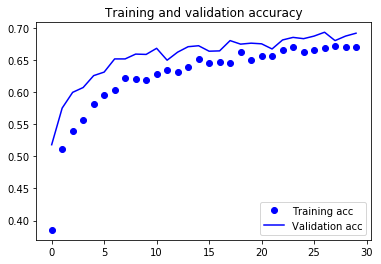

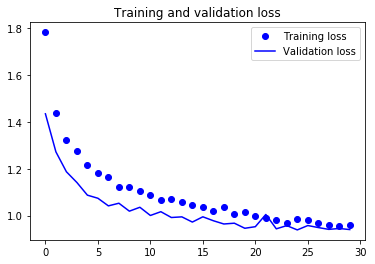

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model3.save('food_model_3(VGG19_frozen).h5')

### VGG19 frozen (above_75 epochs)

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base3 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


#freezeing (without fine tuning of layer freezing)
conv_base3.trainable = False

model3 = models.Sequential()
model3.add(conv_base3) #CGG19 pre-train
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))


conv_base3.summary()
model3.summary()

80142336/80134624 [==============================] - 2s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/75
750/750 [==============================] - 116s 154ms/step - loss: 1.8115 - acc: 0.3817 - val_loss: 1.4603 - val_acc: 0.5135
Epoch 2/75
750/750 [==============================] - 114s 152ms/step - loss: 1.4649 - acc: 0.5020 - val_loss: 1.2805 - val_acc: 0.5635
Epoch 3/75
750/750 [==============================] - 114s 152ms/step - loss: 1.3326 - acc: 0.5465 - val_loss: 1.1933 - val_acc: 0.6105
Epoch 4/75
750/750 [==============================] - 113s 150ms/step - loss: 1.2797 - acc: 0.5584 - val_loss: 1.1658 - val_acc: 0.6035
Epoch 5/75
750/750 [==============================] - 112s 150ms/step - loss: 1.2314 - acc: 0.5792 - val_loss: 1.1025 - val_acc: 0.6260
Epoch 6/75
750/750 [==============================] - 111s 148ms/step - loss: 1.1997 - acc: 0.5869 - val_loss: 1.1213 - val_acc: 0.6215
Epoch 7/75
750/750 [==============================] - 111s 148ms/step - loss: 1.1687 - acc: 0.5972

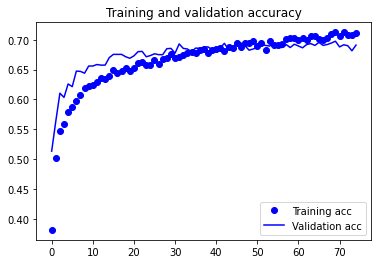

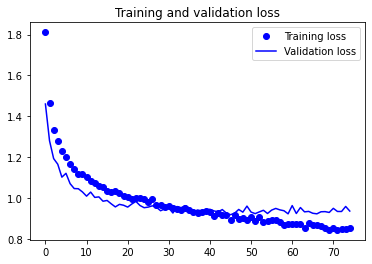

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model3.save('food_model_3(VGG19_frozen)v2.h5')

### VGG19 unfrozen (all layers)

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 111s 148ms/step - loss: 1.3711 - acc: 0.5257 - val_loss: 0.7844 - val_acc: 0.7220
Epoch 2/30
750/750 [==============================] - 113s 150ms/step - loss: 0.8603 - acc: 0.7193 - val_loss: 0.6839 - val_acc: 0.7620
Epoch 3/30
750/750 [==============================] - 113s 150ms/step - loss: 0.7205 - acc: 0.7651 - val_loss: 0.6249 - val_acc: 0.7830
Epoch 4/30
750/750 [==============================] - 112s 150ms/step - loss: 0.6480 - acc: 0.7871 - val_loss: 0.5538 - val_acc: 0.8105
Epoch 5/30
750/750 [==============================] - 111s 148ms/step - loss: 0.6009 - acc: 0.8104 - val_loss: 0.5223 - val_acc: 0.8295
Epoch 6/30
750/750 [==============================] - 112s 149ms/step - loss: 0.5511 - acc: 0.8223 - val_loss: 0.6269 - val_acc: 0.8315
Epoch 7/30
750/750 [==

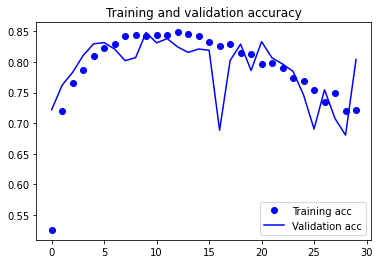

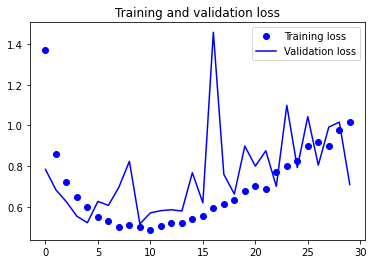

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8019999861717224


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen).h5')
model2.save('food_model_(VGG19_unfrozen)backup.h5')

### VGG19 unfrozen_all + Regularizers

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 218s 290ms/step - loss: 1.8984 - acc: 0.4805 - val_loss: 1.4060 - val_acc: 0.6550
Epoch 2/30
750/750 [==============================] - 217s 290ms/step - loss: 1.2662 - acc: 0.6864 - val_loss: 0.9332 - val_acc: 0.7900
Epoch 3/30
750/750 [==============================] - 217s 289ms/step - loss: 1.0790 - acc: 0.7421 - val_loss: 1.0363 - val_acc: 0.7465
Epoch 4/30
750/750 [==============================] - 217s 289ms/step - loss: 0.9547 - acc: 0.7757 - val_loss: 1.6440 - val_acc: 0.6840
Epoch 5/30
750/750 [==============================] - 217s 290ms/step - loss: 0.8870 - acc: 0.7959 - val_loss: 0.8726 - val_acc: 0.8055
Epoch 6/30
750/750 [==============================] - 217s 289ms/step - loss: 0.8179 - acc: 0.8101 - val_loss: 0.7624 - val_acc: 0.8405
Epoch 7/30
750/750 [==

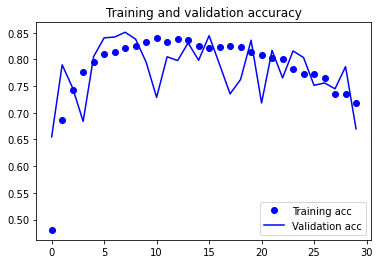

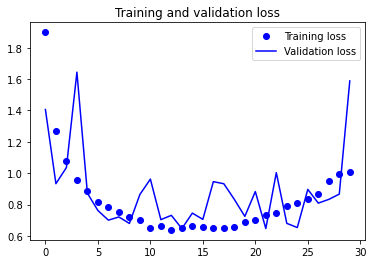

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.6779999732971191


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_regularizer.h5')
model2.save('food_model_(VGG19_unfrozen)_regularizer_backup.h5')

### VGG19 unfrozen (Blk_2) + Regularizers v2

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'block2_conv1': 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 195s 260ms/step - loss: 2.4180 - acc: 0.4035 - val_loss: 1.6161 - val_acc: 0.6445
Epoch 2/30
750/750 [==============================] - 194s 259ms/step - loss: 1.5645 - acc: 0.6440 - val_loss: 1.2048 - val_acc: 0.7600
Epoch 3/30
750/750 [==============================] - 195s 260ms/step - loss: 1.3057 - acc: 0.7089 - val_loss: 1.1360 - val_acc: 0.7615
Epoch 4/30
750/750 [==============================] - 196s 261ms/step - loss: 1.1591 - acc: 0.7567 - val_loss: 0.9840 - val_acc: 0.8015
Epoch 5/30
750/750 [==============================] - 195s 261ms/step - loss: 1.0416 - acc: 0.7724 - val_loss: 0.9408 - val_acc: 0.7915
Epoch 6/30
750/750 [==============================] - 196s 261ms/step - loss: 0.9683 - acc: 0.7907 - val_loss: 0.9662 - val_acc: 0.7760
Epoch 7/30
750/750 [==============================] - 195s 260ms/step - loss: 0.9100 - acc: 0.7992

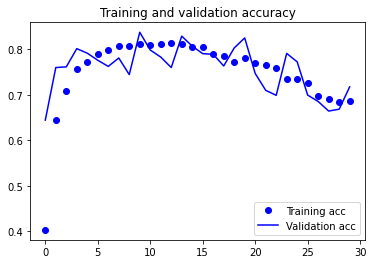

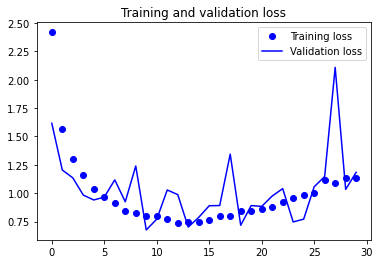

Found 500 images belonging to 10 classes.
test acc: 0.734000027179718


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_regularizer_v2.h5')
model2.save('food_model_(VGG19_unfrozen)_regularizer_v2backup.h5')

### VGG19 unfrozen (Blk_4) + Regularizers v3

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'block4_conv1': 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 144s 192ms/step - loss: 2.4503 - acc: 0.4091 - val_loss: 1.7264 - val_acc: 0.6210
Epoch 2/30
750/750 [==============================] - 143s 191ms/step - loss: 1.6832 - acc: 0.6231 - val_loss: 1.4639 - val_acc: 0.6995
Epoch 3/30
750/750 [==============================] - 143s 191ms/step - loss: 1.4125 - acc: 0.6880 - val_loss: 1.4300 - val_acc: 0.7035
Epoch 4/30
750/750 [==============================] - 143s 191ms/step - loss: 1.2503 - acc: 0.7235 - val_loss: 1.0256 - val_acc: 0.7830
Epoch 5/30
750/750 [==============================] - 144s 192ms/step - loss: 1.1324 - acc: 0.7481 - val_loss: 1.0159 - val_acc: 0.7810
Epoch 6/30
750/750 [==============================] - 143s 191ms/step - loss: 1.0439 - acc: 0.7708 - val_loss: 0.8993 - val_acc: 0.8095
Epoch 7/30
750/750 [==

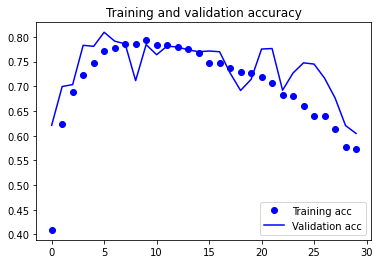

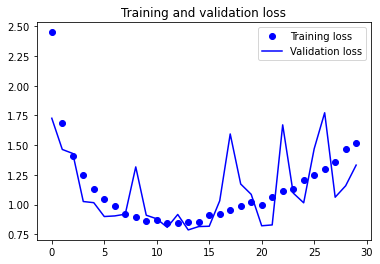

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.5839999914169312


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_regularizer_v3.h5')
model2.save('food_model_(VGG19_unfrozen)_regularizer_v3backup.h5')

### VGG19 unfrozen (all_layers) Adam

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 196s 261ms/step - loss: 1.2748 - acc: 0.5495 - val_loss: 0.7863 - val_acc: 0.7240
Epoch 2/30
750/750 [==============================] - 197s 262ms/step - loss: 0.8090 - acc: 0.7291 - val_loss: 0.5818 - val_acc: 0.8085
Epoch 3/30
750/750 [==============================] - 197s 262ms/step - loss: 0.6901 - acc: 0.7687 - val_loss: 0.6021 - val_acc: 0.8070
Epoch 4/30
750/750 [==============================] - 196s 262ms/step - loss: 0.5800 - acc: 0.8051 - val_loss: 0.5826 - val_acc: 0.8065
Epoch 5/30
750/750 [==============================] - 196s 262ms/step - loss: 0.5252 - acc: 0.8279 - val_loss: 0.4908 - val_acc: 0.8410
Epoch 6/30
750/750 [==============================] - 196s 262ms/step - loss: 0.4663 - acc: 0.8419 - val_loss: 0.5280 - val_acc: 0.8385
Epoch 7/30
750/750 [==

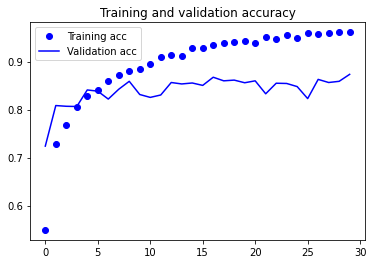

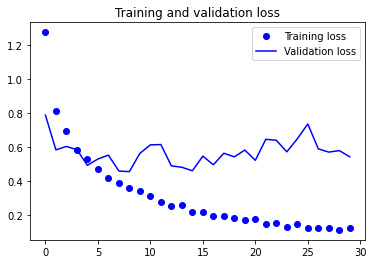

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.871999979019165


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_backup.h5')

### VGG19 unfrozen (all_layers) Adam + Regularizers

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 106s 141ms/step - loss: 1.8744 - acc: 0.5037 - val_loss: 1.2928 - val_acc: 0.7055
Epoch 2/30
750/750 [==============================] - 105s 141ms/step - loss: 1.2825 - acc: 0.7047 - val_loss: 1.0165 - val_acc: 0.7870
Epoch 3/30
750/750 [==============================] - 105s 140ms/step - loss: 1.1007 - acc: 0.7620 - val_loss: 1.0139 - val_acc: 0.7885
Epoch 4/30
750/750 [==============================] - 107s 142ms/step - loss: 0.9848 - acc: 0.7984 - val_loss: 0.9425 - val_acc: 0.8020
Epoch 5/30
750/750 [==============================] - 106s 141ms/step - loss: 0.9089 - acc: 0.8173 - val_loss: 0.8703 - val_acc: 0.8290
Epoch 6/30
750/750 [==============================] - 106s 141ms/step - loss: 0.8483 - acc: 0.8299 - val_loss: 0.8633 - val_acc: 0.8190
Epoch 7/30
750/750 [==

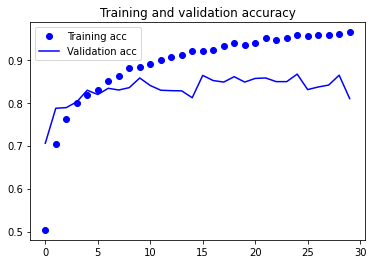

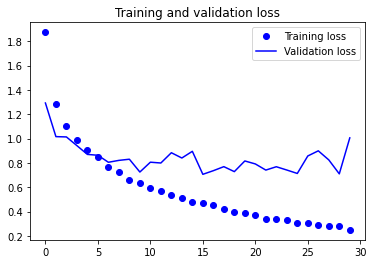

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8339999914169312


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_backup.h5')

### VGG19 unfrozen (all_layers) Adam + Regularizers [v2]

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
750/750 [==============================] - 122s 163ms/step - loss: 3.5124 - acc: 0.2549 - val_loss: 2.8035 - val_acc: 0.5140
Epoch 2/75
750/750 [==============================] - 125s 166ms/step - loss: 2.6940 - acc: 0.5196 - val_loss: 2.1584 - val_acc: 0.6915
Epoch 3/75
750/750 [==============================] - 125s 167ms/step - loss: 2.2757 - acc: 0.6520 - val_loss: 1.8822 - val_acc: 0.7615
Epoch 4/75
750/750 [==============================] - 126s 168ms/step - loss: 2.0293 - acc: 0.7188 - val_loss: 1.6853 - val_acc: 0.8055
Epoch 5/75
750/750 [==============================] - 125s 167ms/step - loss: 1.8847 - acc: 0.7505 - val_loss: 1.7852 - val_acc: 0.7705
Epoch 6/75
750/750 [==============================] - 125s 167ms/step - loss: 1.7442 - acc: 0.7804 - val_loss: 1.5925 - val_acc: 0.8035
Epoch 7/75
750/750 [==

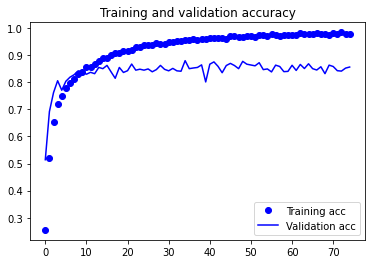

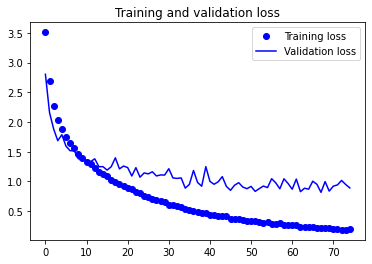

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8659999966621399


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_v2_backup.h5')

### Re-run above with 30 Epoch + 8e-4

In [6]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-6),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 88s 118ms/step - loss: 4.0716 - acc: 0.1135 - val_loss: 3.8455 - val_acc: 0.2210
Epoch 2/30
750/750 [==============================] - 88s 117ms/step - loss: 3.8329 - acc: 0.1684 - val_loss: 3.5806 - val_acc: 0.3630
Epoch 3/30
750/750 [==============================] - 88s 117ms/step - loss: 3.6137 - acc: 0.2565 - val_loss: 3.2630 - val_acc: 0.4330
Epoch 4/30
750/750 [==============================] - 88s 117ms/step - loss: 3.3914 - acc: 0.3321 - val_loss: 2.9845 - val_acc: 0.5100
Epoch 5/30
750/750 [==============================] - 87s 116ms/step - loss: 3.1778 - acc: 0.3993 - val_loss: 2.7651 - val_acc: 0.5725
Epoch 6/30
750/750 [==============================] - 88s 117ms/step - loss: 3.0083 - acc: 0.4492 - val_loss: 2.5906 - val_acc: 0.6180
Epoch 7/30
750/750 [==============================] - 88s 117ms/step - loss: 2.8455 - acc: 0.4979 - val_

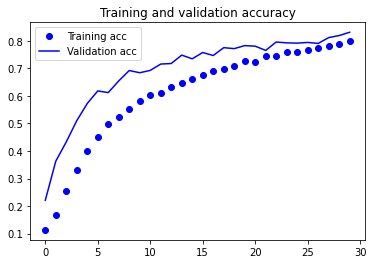

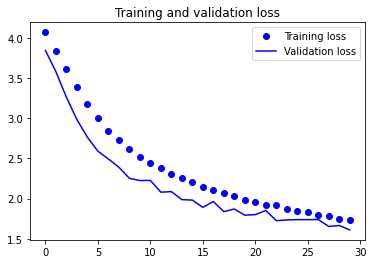

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8220000267028809


In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun_backup.h5')

### Re-run above (with 30 [+20] Epoch + 8e-4) + lower regularization

In [4]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [6]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-6),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 91s 122ms/step - loss: 3.0272 - acc: 0.1929 - val_loss: 2.6018 - val_acc: 0.3940
Epoch 2/30
750/750 [==============================] - 90s 120ms/step - loss: 2.5403 - acc: 0.3868 - val_loss: 2.1386 - val_acc: 0.5460
Epoch 3/30
750/750 [==============================] - 89s 119ms/step - loss: 2.2485 - acc: 0.4893 - val_loss: 1.9213 - val_acc: 0.6325
Epoch 4/30
750/750 [==============================] - 89s 119ms/step - loss: 2.0783 - acc: 0.5528 - val_loss: 1.8665 - val_acc: 0.6500
Epoch 5/30
750/750 [==============================] - 90s 119ms/step - loss: 1.9427 - acc: 0.6068 - val_loss: 1.6787 - val_acc: 0.6985
Epoch 6/30
750/750 [==============================] - 89s 119ms/step - loss: 1.8656 - acc: 0.6329 - val_loss: 1.6779 - val_acc: 0.7010
Epoch 7/30
750/750 [========

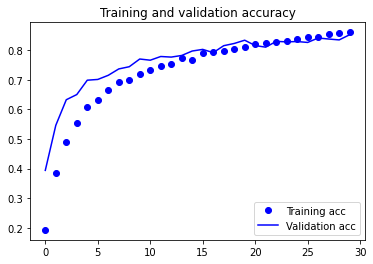

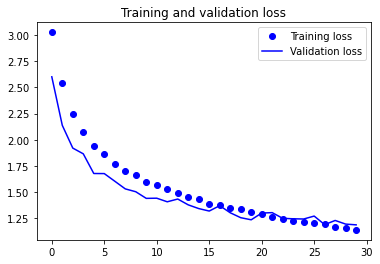

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8460000157356262


In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun1.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun1_backup.h5')

In [5]:
# +20 epochs (total 50)

model2 = models.load_model(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun1.h5')
model2.summary()
# Train the Model
#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-6),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

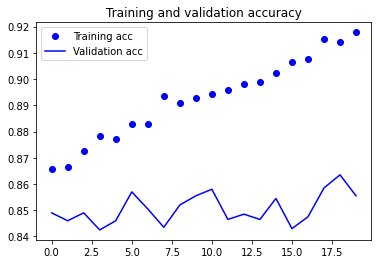

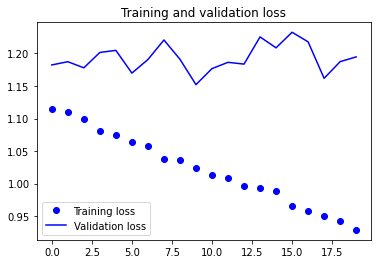

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8519999980926514


In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun1_1.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_v2_rerun1_1_backup.h5')

### VGG19 (unfrozen) Adam + Regularizers [fine-tune blk4]

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'block4_conv1': 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
750/750 [==============================] - 138s 184ms/step - loss: 3.7201 - acc: 0.1133 - val_loss: 3.4943 - val_acc: 0.1320
Epoch 2/75
750/750 [==============================] - 138s 184ms/step - loss: 3.3129 - acc: 0.1496 - val_loss: 3.1193 - val_acc: 0.2915
Epoch 3/75
750/750 [==============================] - 136s 181ms/step - loss: 2.9222 - acc: 0.2472 - val_loss: 2.4237 - val_acc: 0.4580
Epoch 4/75
750/750 [==============================] - 136s 181ms/step - loss: 2.3787 - acc: 0.4332 - val_loss: 1.9373 - val_acc: 0.5965
Epoch 5/75
750/750 [==============================] - 136s 181ms/step - loss: 2.0204 - acc: 0.5579 - val_loss: 1.6782 - val_acc: 0.6625
Epoch 6/75
750/750 [==============================] - 136s 181ms/step - loss: 1.7813 - acc: 0.6341 - val_loss: 1.5148 - val_acc: 0.7265
Epoch 7/75
750/750 [==

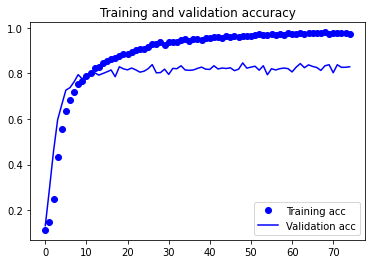

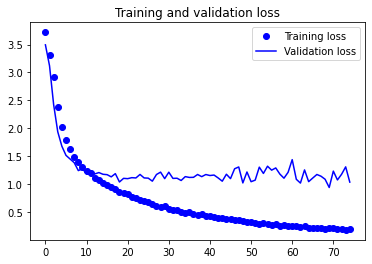

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8240000009536743


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2(blk4).h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_v2(blk4)backup.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [0]:
# Model #1
model.load_weights('food_model_1.h5')




In [0]:
# Model #2
model.load_weights('food_model_2.h5')




In [0]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [0]:
# Load the model
model.load_weights('food_model_best.h5')

In [0]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [0]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [0]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)